In [28]:
import yfinance as yf
from datascience import *
from urllib.request import urlopen
from twitter_scraper import get_trends
from datetime import datetime, timedelta
import numpy as np
%matplotlib inline

In [29]:
def getStockData(stockName,start_date = '2021-01-01',end_date='2021-07-12'):
    #print('Recuperando info')
    return yf.download(stockName, start_date, end_date)

In [30]:
def getClosePrice(data):
    #print(data)
    logPrice=np.log(1+data['Adj Close'].pct_change())
    #print(logPrice)
    data=data.values.tolist()#convertir data frame a lista
    close=[]
    for i in data:
        close.append(i[4])   
    return logPrice, close 



In [31]:
def changeInPrice(currentPrice, mu,sigma,dt,caminos):
    return (mu * dt + sigma * np.sqrt(dt) * np.random.randn(caminos)) * currentPrice

[*********************100%***********************]  1 of 1 completed


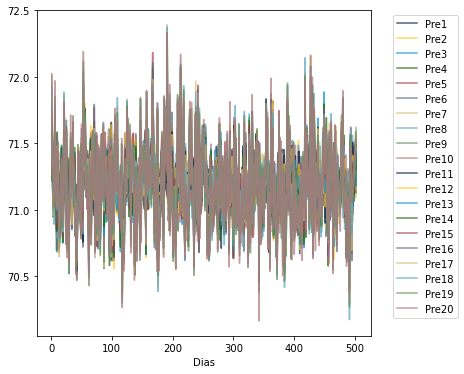

In [32]:
nombreStock = 'AAPL'
dias=502
caminos =20
#nombreStock = 'AMZN'
#todo agregar que lo realice con la fecha de hoy
#agregar que el usuario de tiempo a predecir 
stock=getStockData(nombreStock,start_date='2017-12-29',end_date='2019-12-30')#agregar datetime 
logPrice, adjClose=getClosePrice(stock)

mu=logPrice.mean()
sigma=logPrice.std()#print(mu)#print(sigma)

predictedPrices = [adjClose[-1]]
dt=2/(dias-1)


for i in np.arange(1, caminos + 1):  
    currentPrice=predictedPrices[i - 1]    
    #predictedPrices[i] = currentPrice + changeInPrice(currentPrice,mu,sigma,dt,caminos)#simulacion de
    predictedPrices.append(currentPrice + changeInPrice(currentPrice,mu,sigma,dt,dias))



#graficar las tablas

numeroDias=[x+1 for x in range(dias)]
tabla=Table().with_column('Dias',numeroDias)

for i in range(1,len(predictedPrices)):
    nombreTabla='Pre'+str(i)
    tabla=tabla.with_columns(nombreTabla, predictedPrices[i])
tabla.plot('Dias')


# for i in range(1,len(predictedPrices)):
#     #print(predictedPrices[i])
#     numeroDias=[x+1 for x in range(len(predictedPrices[i]))]
#     #print(numeroDias)
#     nombreTabla='Pre'+str(i)
#     tabla=Table().with_columns('Dias',numeroDias,nombreTabla, predictedPrices[i])
#     tabla.plot('Dias')

# numeroDias=[x+1 for x in range(len(adjClose))]
# apple=Table().with_columns('Dias',numeroDias,'Adj Close', adjClose)
# apple.plot('Dias')


Analyzing data for stock: AAPL
[*********************100%***********************]  1 of 1 completed
Analyzing data for stock: MSFT
[*********************100%***********************]  1 of 1 completed
Analyzing data for stock: TSLA
[*********************100%***********************]  1 of 1 completed


144.4396457355926

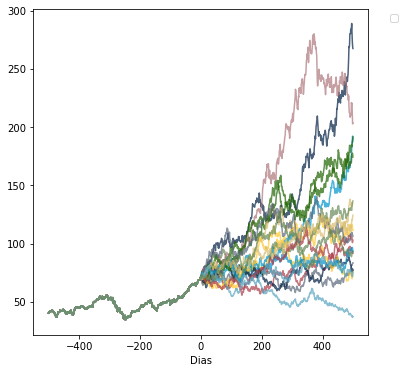

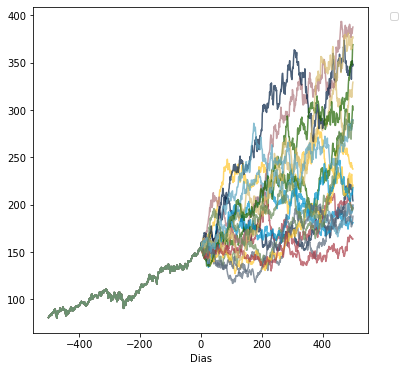

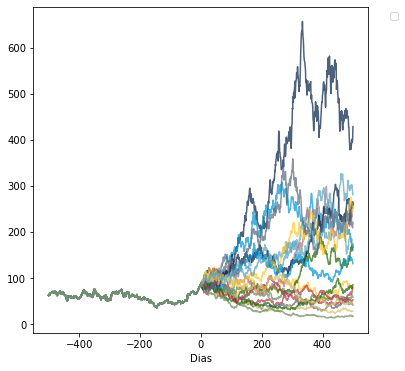

In [47]:
#intento 2
def analyzeStock(nombreStock, startDate, endDate, dias:int=60,caminos:int=20):
    try:
        print("Analyzing data for stock: "+nombreStock)
        stock=getStockData(nombreStock,start_date=startDate,end_date=endDate)
    except:
        print('No se logro recuperar información del stock')
    else:
        logPrice, adjClose=getClosePrice(stock)
        mu=logPrice.mean()
        sigma=logPrice.std()#print(mu)#print(sigma)

        predictedPrices=[]
        finalPrices = []
        for i in np.arange(1, caminos + 1):  
            precioInicial=adjClose[-1]
            simulacion=np.random.normal(mu,sigma,dias) 
            datos=precioInicial*(simulacion+1).cumprod()
            tmp=adjClose.copy()
            for j in datos:
                tmp.append(j)
            finalPrices.append(tmp[-1])
            predictedPrices.append(tmp)
        #print(len(predictedPrices[0]))
        #graficar las tablas 
        #numeroDias=[x+1 for x in range(len(predictedPrices[0]))]
        numeroDias=[x+1 for x in range(-len(adjClose),dias)]
        tabla=Table().with_column('Dias',numeroDias)
        for i in range(1,len(predictedPrices)):
            nombreTabla='Pre'+str(i)
            tabla=tabla.with_columns(nombreTabla, predictedPrices[i])
        tabla.plot('Dias',label='_nolegend_')
        return np.mean(finalPrices)

        
analyzeStock('AAPL', '2017-12-29', '2019-12-30',dias=500,caminos=20)
analyzeStock('MSFT', '2017-12-29', '2019-12-30',dias=500,caminos=20)
analyzeStock('TSLA', '2017-12-29', '2019-12-30',dias=500,caminos=20)

Type a space separated list with the tickers of the stock you are intrested in: AAPL
How many months are you interested in keeping your stock for? 4
Analyzing data for stock: AAPL
[*********************100%***********************]  1 of 1 completed
The best stock to invest for 4 months is AAPL with a mean price of 159.45


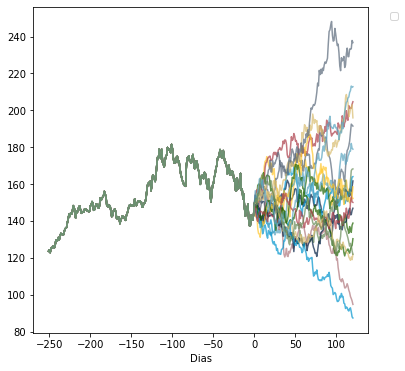

In [48]:
def __main__():
    stocks = input("Type a space separated list with the tickers of the stock you are intrested in: ").split()
    months = int(input("How many months are you interested in keeping your stock for? "))
    days = months * 30
    present = datetime.today() - timedelta(days=1)
    past = present - timedelta(days=365)
    present = present.strftime('%Y-%m-%d')
    past = past.strftime('%Y-%m-%d')
    stockMean = []
    for stock in stocks:
        currentMean = analyzeStock(stock, past, present, days, 20)
        stockMean.append(currentMean)
    maxMean = np.max(stockMean)
    maxIndex = stockMean.index(maxMean)
    print("The best stock to invest for "+str(months)+" months is "+stocks[maxIndex]+" with a mean price of "+str(round(maxMean,2)))
    
__main__()